In [1]:
import gdsfactory as gf

┏━━━━━━┳━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ name ┃ width ┃ orientation ┃ layer       ┃ center          ┃ port_type  ┃
┡━━━━━━╇━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━┩
│ o1   │ 0.5   │ 180.0       │ WG (1/0)    │ (-10.0, -0.625) │ optical    │
│ o2   │ 0.5   │ 180.0       │ WG (1/0)    │ (-10.0, 0.625)  │ optical    │
│ o4   │ 0.5   │ 0.0         │ WG (1/0)    │ (91.0, -0.625)  │ optical    │
│ o3   │ 0.5   │ 0.0         │ WG (1/0)    │ (91.0, 0.625)   │ optical    │
│ e1   │ 11.0  │ 180.0       │ MTOP (49/0) │ (19.6, 22.625)  │ electrical │
│ e3   │ 11.0  │ 90.0        │ MTOP (49/0) │ (25.1, 28.125)  │ electrical │
│ e6   │ 11.0  │ 0.0         │ MTOP (49/0) │ (30.6, 22.625)  │ electrical │
│ e8   │ 11.0  │ 270.0       │ MTOP (49/0) │ (25.1, 17.125)  │ electrical │
│ e2   │ 11.0  │ 180.0       │ MTOP (49/0) │ (50.4, 22.625)  │ electrical │
│ e4   │ 11.0  │ 90.0        │ MTOP (49/0) │ (55.9, 28.125)  │ electrical │
│ e5   │ 11.0  │ 0.0         │ MTOP (49/0) │ (61.4, 22.625)  │ electrical │
│ e7   │ 11.0  │ 270.0       │ MTOP (49/0) │ (55.9, 17.125)  │ electrical │
└──────┴───────┴─────────────┴─────────────┴─────────────────┴────────────┘

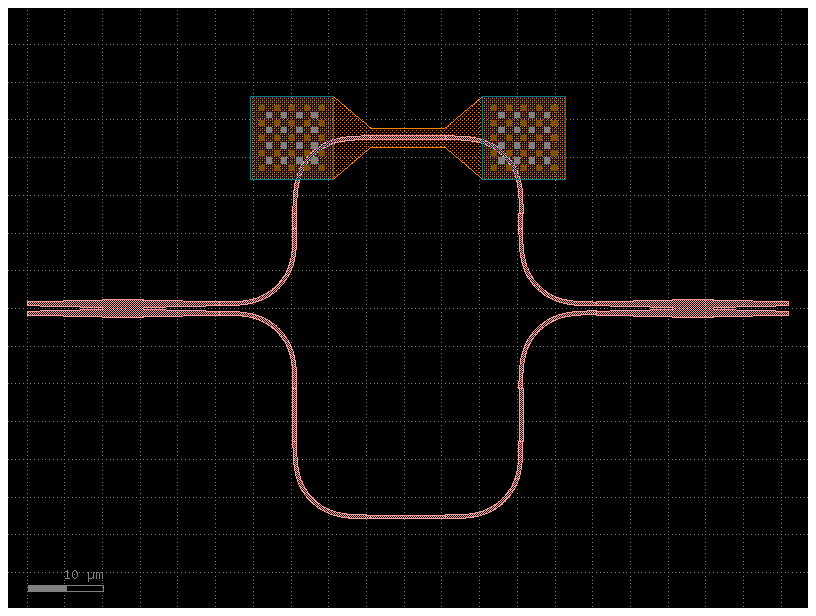

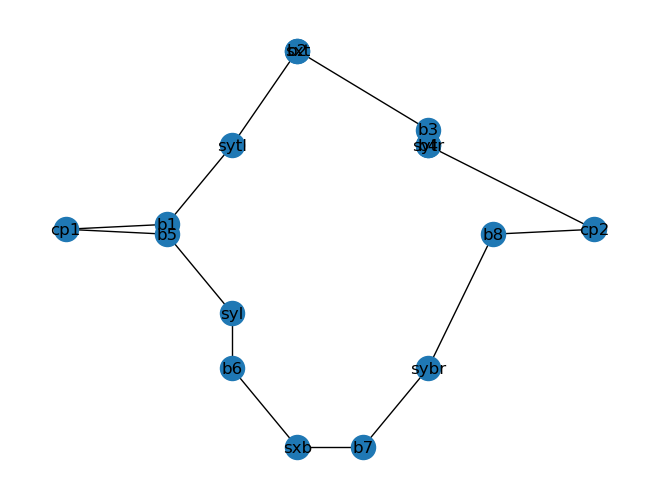

In [2]:
mzi = gf.components.mzi2x2_2x2_phase_shifter(delta_length=10, length_y=2, length_x=10, bend='bend_euler', straight='straight', straight_x_top='straight_heater_metal', splitter='mmi2x2', combiner='mmi2x2', with_splitter=True, port_e1_splitter='o3', port_e0_splitter='o4', port_e1_combiner='o3', port_e0_combiner='o4', port1='o1', port2='o2', nbends=2, cross_section='strip', mirror_bot=False, add_optical_ports_arms=False, min_length=0.01, auto_rename_ports=True).copy()

mzi.pprint_ports()

mzi.plot()

mzi.plot_netlist()

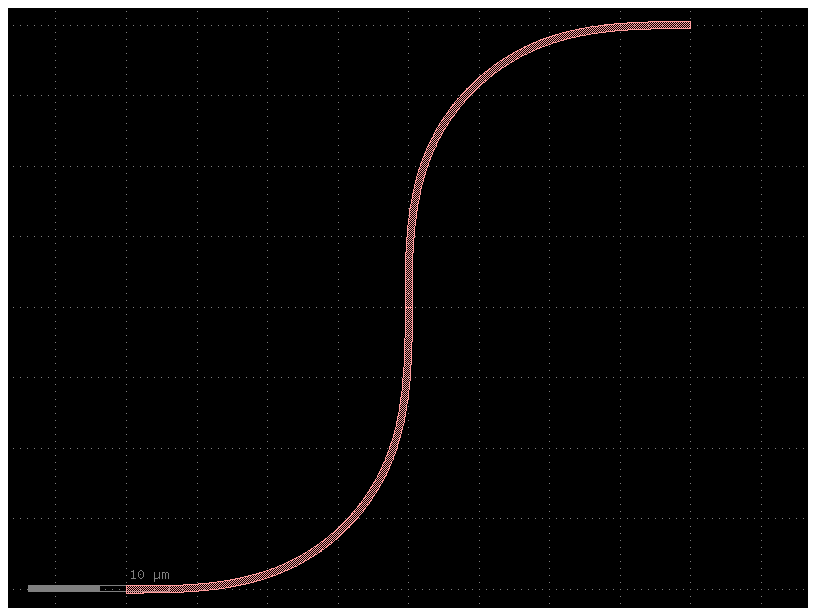

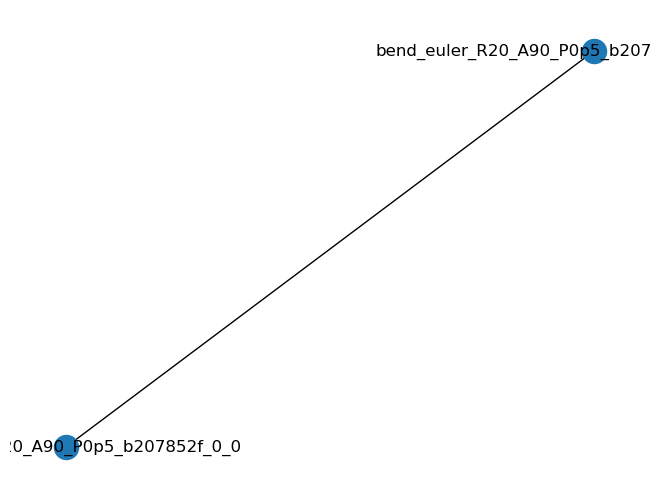

In [3]:
bend_s = gf.components.bend_euler_s(radius=20,p=0.5, with_arc_floorplan=True, cross_section='strip', allow_min_radius_violation=False, port1='o1', port2='o2').copy()

bend_s.plot()

bend_s.plot_netlist()

┏━━━━━━┳━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ name ┃ width ┃ orientation ┃ layer       ┃ center       ┃ port_type  ┃
┡━━━━━━╇━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━━━━━━━╇━━━━━━━━━━━━┩
│ o1   │ 0.5   │ 180.0       │ WG (1/0)    │ (0.0, 0.0)   │ optical    │
│ o2   │ 0.5   │ 0.0         │ WG (1/0)    │ (40.0, 40.0) │ optical    │
│ e1   │ 10.0  │ 180.0       │ MTOP (49/0) │ (15.0, 20.0) │ electrical │
└──────┴───────┴─────────────┴─────────────┴──────────────┴────────────┘

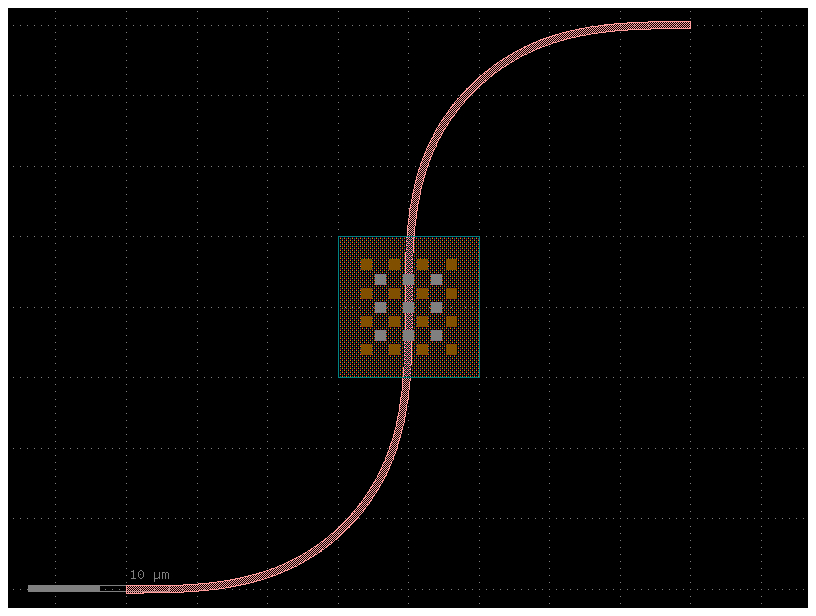

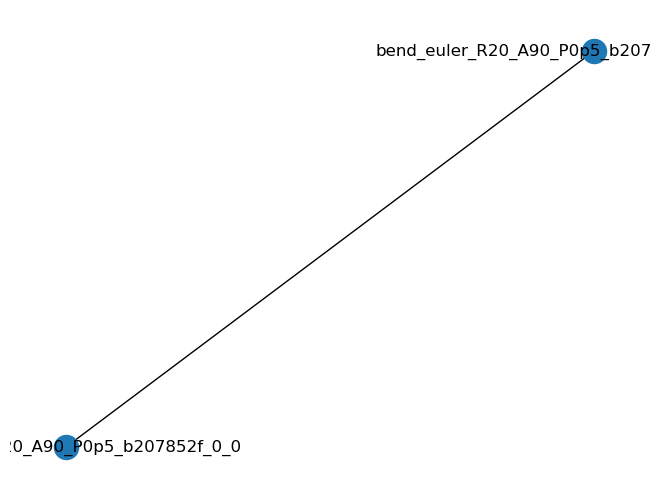

In [26]:
bend_s_heater = gf.components.bend_euler_s(radius=20,p=0.5, with_arc_floorplan=True, cross_section='strip', allow_min_radius_violation=False, port1='o1', port2='o2').copy()

heater_cell = gf.components.via_stack_heater_mtop_mini(size=(10, 10), layers=('HEATER', 'M2', 'MTOP'), correct_size=True, slot_horizontal=False, slot_vertical=False, port_orientations=(180, 90, 0, -90)).copy()

heater = bend_s_heater << heater_cell
heater.movex(20)
heater.movey(20)

bend_s_heater.add_port(name="e1", port=heater.ports["e1"])

bend_s_heater.pprint_ports()

bend_s_heater.plot()

bend_s_heater.plot_netlist()

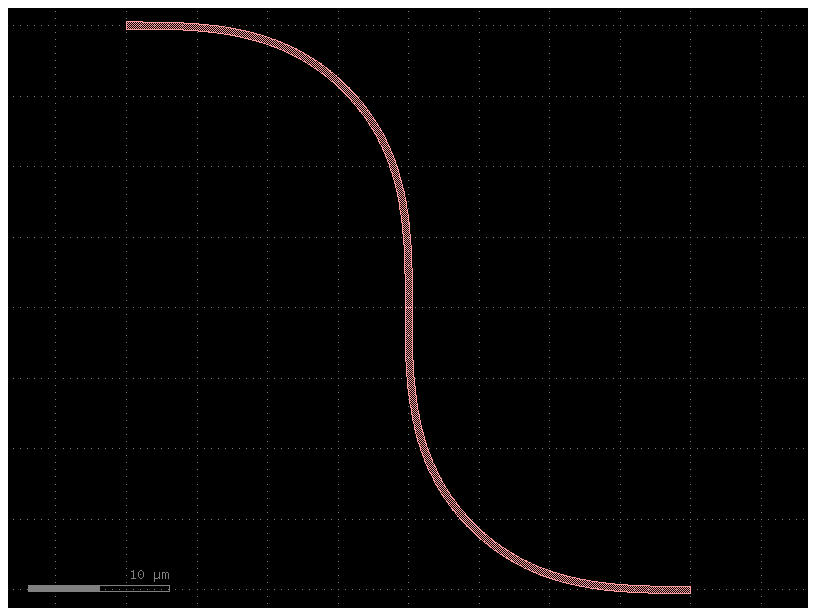

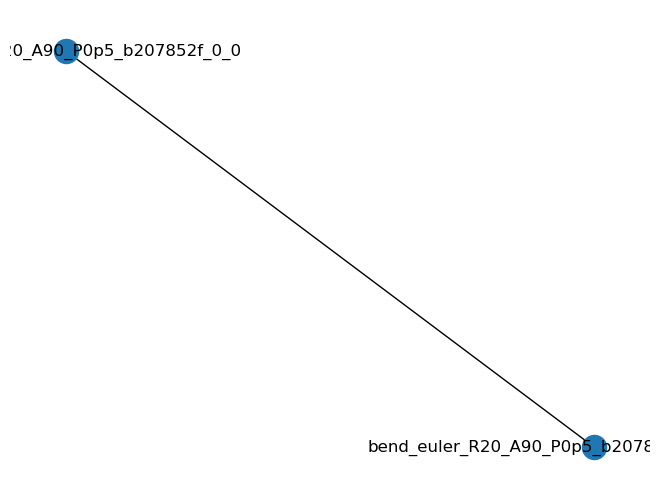

In [5]:
bend_s_mirror = gf.components.bend_euler_s(radius=20, p=0.5, with_arc_floorplan=True, cross_section='strip', allow_min_radius_violation=False, port1='o1', port2='o2').copy()

bend_s_mirror.mirror_y()

bend_s_mirror.plot()

bend_s_mirror.plot_netlist()

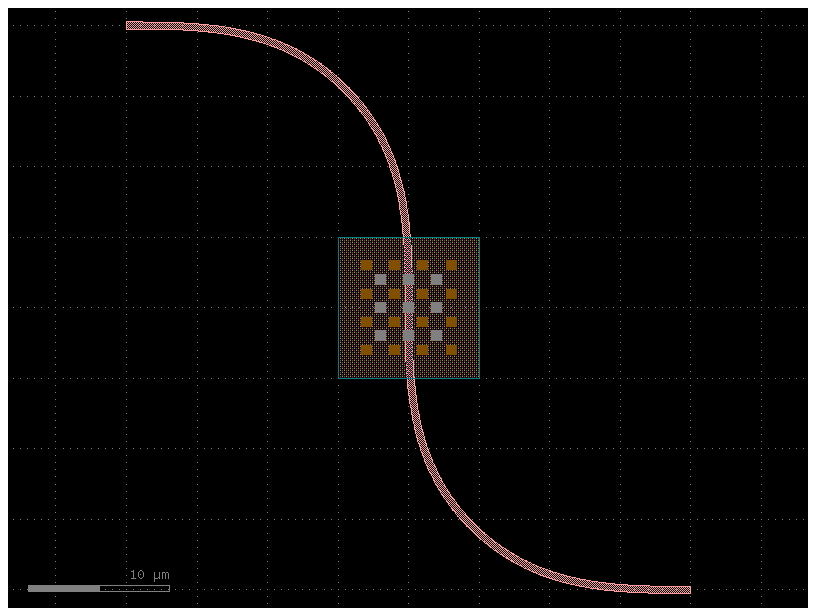

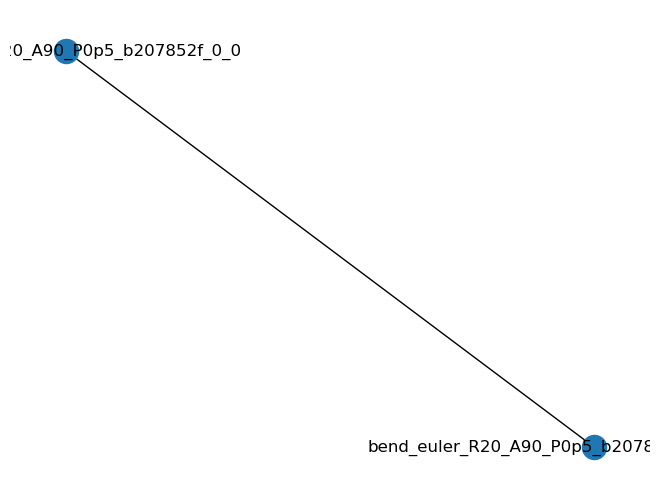

In [16]:
bend_s_mirror_heater = gf.components.bend_euler_s(radius=20, p=0.5, with_arc_floorplan=True, cross_section='strip', allow_min_radius_violation=False, port1='o1', port2='o2').copy()

bend_s_mirror_heater.mirror_y()

heater_cell = gf.components.via_stack_heater_mtop_mini(size=(10, 10), layers=('HEATER', 'M2', 'MTOP'), correct_size=True, slot_horizontal=False, slot_vertical=False, port_orientations=(180, 90, 0, -90)).copy()

heater = bend_s_mirror_heater << heater_cell

heater.movex(20)
heater.movey(-20)

bend_s_mirror_heater.plot()

bend_s_mirror_heater.plot_netlist()

┏━━━━━━┳━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ name ┃ width ┃ orientation ┃ layer       ┃ center           ┃ port_type  ┃
┡━━━━━━╇━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━┩
│ i1   │ 0.5   │ 180.0       │ WG (1/0)    │ (-50.0, -40.625) │ optical    │
│ i2   │ 0.5   │ 180.0       │ WG (1/0)    │ (-50.0, 40.625)  │ optical    │
│ o2   │ 0.5   │ 0.0         │ WG (1/0)    │ (131.0, 40.625)  │ optical    │
│ o1   │ 0.5   │ 0.0         │ WG (1/0)    │ (131.0, -40.625) │ optical    │
│ e3   │ 11.0  │ 90.0        │ MTOP (49/0) │ (25.1, 28.125)   │ electrical │
└──────┴───────┴─────────────┴─────────────┴──────────────────┴────────────┘

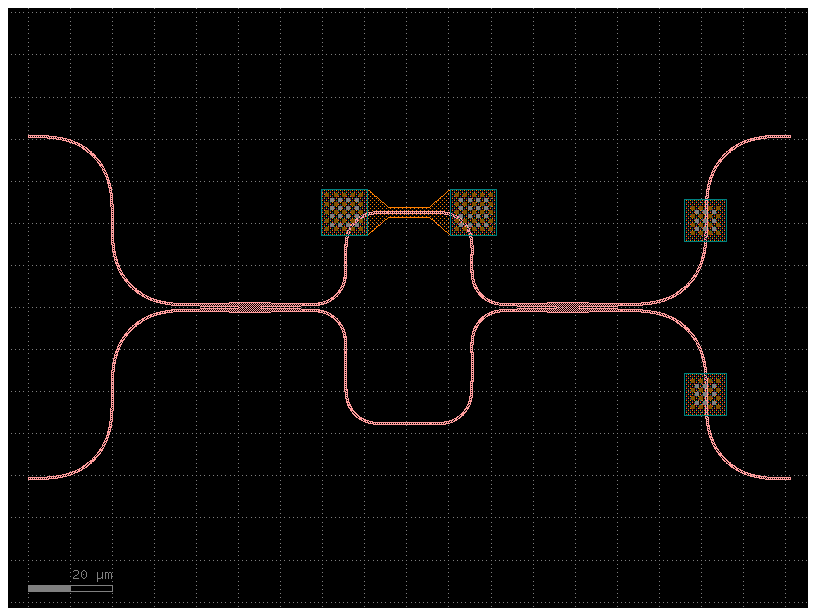

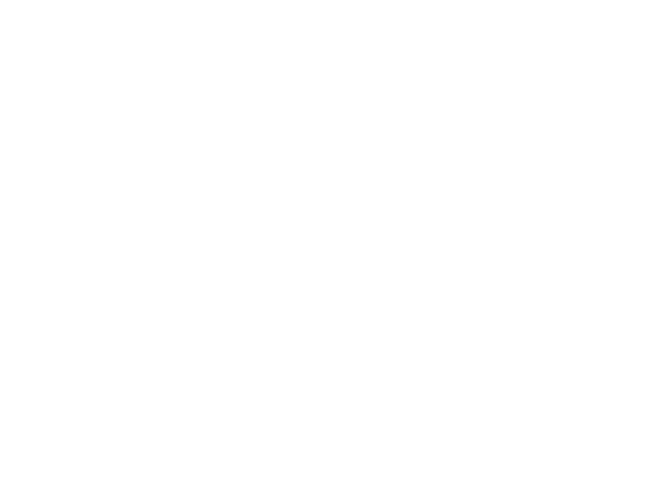

In [ ]:
@gf.cell
def mzi_cell_gf():
    c = gf.Component()
    mziRef = c.add_ref(mzi, name="mzi")
    s1 = c.add_ref(bend_s, name="bend1")
    s2 = c.add_ref(bend_s_mirror, name="bend2")
    s3 = c.add_ref(bend_s_heater, name="bend3")
    s4 = c.add_ref(bend_s_mirror_heater, name="bend4")
    s1.connect("o2", mziRef.ports["o1"]) # connecting port-"o2"-of-bends1 to port-"o1"-of-mzi1 
    s2.connect("o2", mziRef.ports["o2"], mirror=True) # connecting port-"o2"-of-bends2 to port-"o2"-of-mzi1 
    s3.connect("o1", mziRef.ports["o3"]) # connecting port-"o1"-of-bends3 to port-"o3"-of-mzi1 
    s4.connect("o1", mziRef.ports["o4"], mirror=True) # connecting port-"o1"-of-bends4 to port-"o4"-of-mzi1 
    c.add_port(name="i1", port=s1.ports["o1"]) # defining port-"o1"-of-bends1 as port-"p1"-of-mzi_cell
    c.add_port(name="i2", port=s2.ports["o1"]) # defining port-"o1"-of-bends2 as port-"p2"-of-mzi_cell
    c.add_port(name="o2", port=s3.ports["o2"]) # defining port-"o2"-of-bends3 as port-"p3"-of-mzi_cell
    c.add_port(name="o1", port=s4.ports["o2"]) # defining port-"o2"-of-bends4 as port-"p4"-of-mzi_cell
    c.add_port(name="ei1", port=mziRef.ports["e3"])
    c.add_port(name="eo1", port=s3.ports[""])
    return c

mzi_cell_Gf = mzi_cell_gf()
mzi_cell_Gf.plot()

mzi_cell_Gf.pprint_ports()

mzi_cell_Gf.draw_ports()

mzi_cell_Gf.plot_netlist()

┏━━━━━━┳━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━┓
┃ name ┃ width ┃ orientation ┃ layer    ┃ center           ┃ port_type ┃
┡━━━━━━╇━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━┩
│ i1   │ 0.5   │ 180.0       │ WG (1/0) │ (-50.0, -40.625) │ optical   │
│ i2   │ 0.5   │ 180.0       │ WG (1/0) │ (-50.0, 40.625)  │ optical   │
│ o2   │ 0.5   │ 0.0         │ WG (1/0) │ (131.0, 40.625)  │ optical   │
│ o1   │ 0.5   │ 0.0         │ WG (1/0) │ (131.0, -40.625) │ optical   │
└──────┴───────┴─────────────┴──────────┴──────────────────┴───────────┘

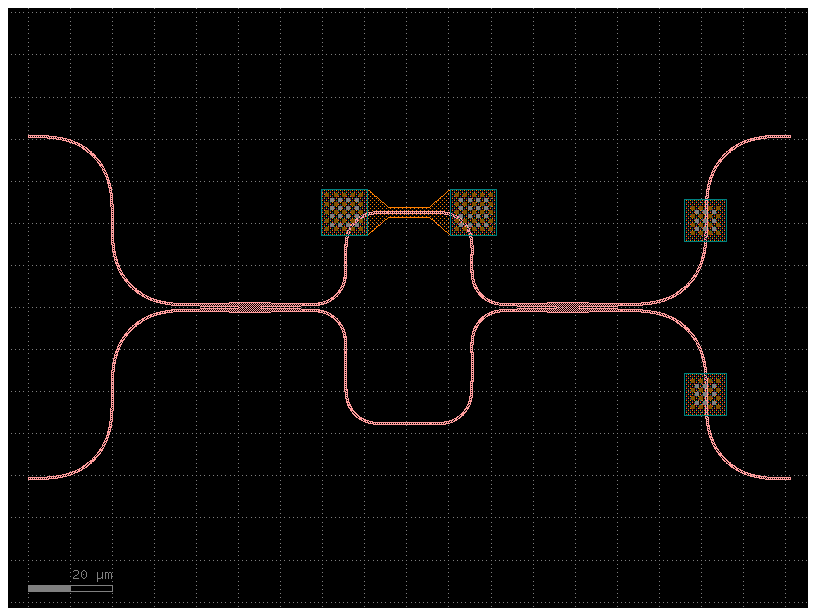

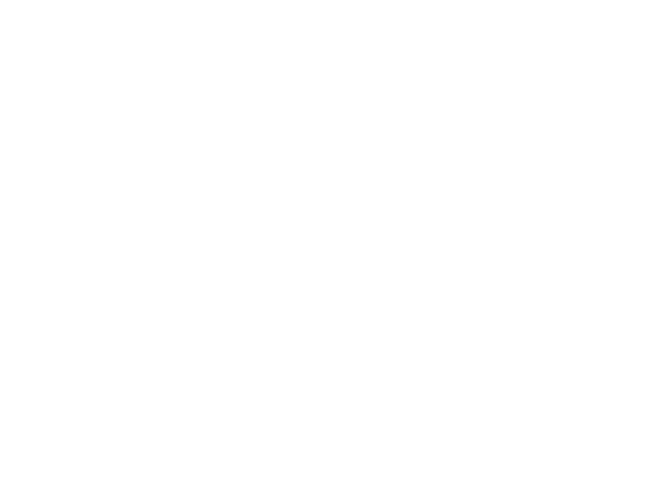

In [8]:
mzi_cell = gf.Component() # defining new "blank" component as mzi_cell

mzi1 = mzi_cell << mzi # defining new mzi inside mzi_cell as "mzi1"

bends1 = mzi_cell << bend_s # defining new s-bend
bends2 = mzi_cell << bend_s_mirror # defining new mirrored s-bend
bends3 = mzi_cell << bend_s_heater # defining new s-bend
bends4 = mzi_cell << bend_s_mirror_heater # defining new mirrored s-bend

bends1.connect("o2", mzi1.ports["o1"]) # connecting port-"o2"-of-bends1 to port-"o1"-of-mzi1 
bends2.connect("o2", mzi1.ports["o2"], mirror=True) # connecting port-"o2"-of-bends2 to port-"o2"-of-mzi1 
bends3.connect("o1", mzi1.ports["o3"]) # connecting port-"o1"-of-bends3 to port-"o3"-of-mzi1 
bends4.connect("o1", mzi1.ports["o4"], mirror=True) # connecting port-"o1"-of-bends4 to port-"o4"-of-mzi1 

mzi_cell.add_port(name="i1", port=bends1.ports["o1"]) # defining port-"o1"-of-bends1 as port-"p1"-of-mzi_cell
mzi_cell.add_port(name="i2", port=bends2.ports["o1"]) # defining port-"o1"-of-bends2 as port-"p2"-of-mzi_cell
mzi_cell.add_port(name="o2", port=bends3.ports["o2"]) # defining port-"o2"-of-bends3 as port-"p3"-of-mzi_cell
mzi_cell.add_port(name="o1", port=bends4.ports["o2"]) # defining port-"o2"-of-bends4 as port-"p4"-of-mzi_cell

mzi_cell.plot()

mzi_cell.plot_netlist()

mzi_cell.pprint_ports()

┏━━━━━━┳━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━┓
┃ name ┃ width ┃ orientation ┃ layer    ┃ center             ┃ port_type ┃
┡━━━━━━╇━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━┩
│ in1  │ 0.5   │ 180.0       │ WG (1/0) │ (-231.0, -121.875) │ optical   │
│ in2  │ 0.5   │ 180.0       │ WG (1/0) │ (-231.0, -40.625)  │ optical   │
│ in3  │ 0.5   │ 180.0       │ WG (1/0) │ (-50.0, 40.625)    │ optical   │
│ in4  │ 0.5   │ 180.0       │ WG (1/0) │ (131.0, 121.875)   │ optical   │
│ out4 │ 0.5   │ 0.0         │ WG (1/0) │ (312.0, 121.875)   │ optical   │
│ out3 │ 0.5   │ 0.0         │ WG (1/0) │ (493.0, 40.625)    │ optical   │
│ out2 │ 0.5   │ 0.0         │ WG (1/0) │ (674.0, -40.625)   │ optical   │
│ out1 │ 0.5   │ 0.0         │ WG (1/0) │ (674.0, -121.875)  │ optical   │
└──────┴───────┴─────────────┴──────────┴────────────────────┴───────────┘

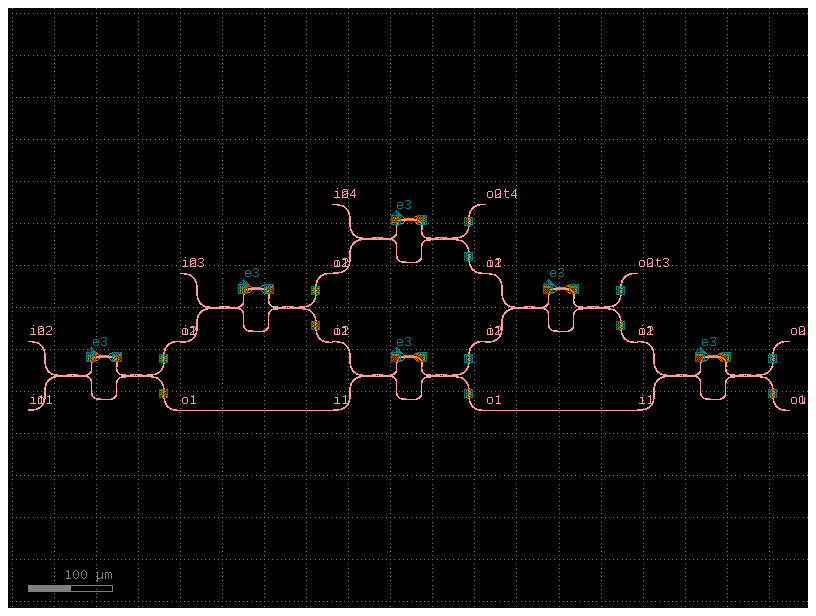

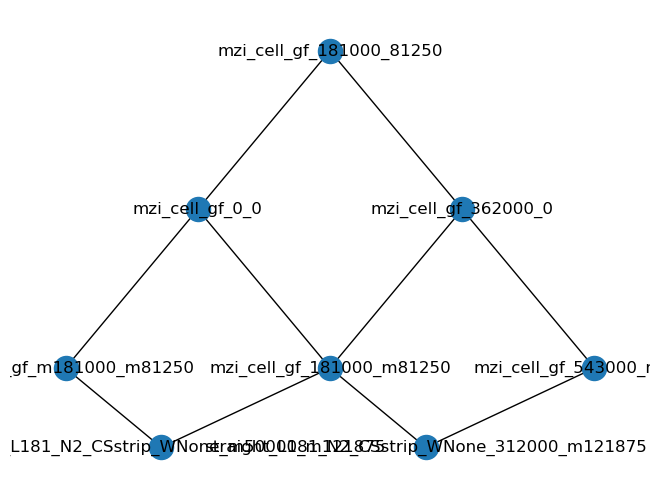

In [9]:
mziMatrix = gf.Component()

# ========================================
#       defining MZIs
# ========================================
mzi_cell1 = mziMatrix << mzi_cell_Gf
mzi_cell2 = mziMatrix << mzi_cell_Gf
mzi_cell3 = mziMatrix << mzi_cell_Gf
mzi_cell4 = mziMatrix << mzi_cell_Gf
mzi_cell5 = mziMatrix << mzi_cell_Gf
mzi_cell6 = mziMatrix << mzi_cell_Gf

# # ========================================
# #      MZIs labeling
# # ========================================
# mziMatrix.add_label(text="MZI111", position=mzi_cell1.dcenter)
# mziMatrix.add_label(text="MZI222", position=mzi_cell2.dcenter)
# mziMatrix.add_label(text="MZI333", position=mzi_cell3.dcenter)
# mziMatrix.add_label(text="MZI444", position=mzi_cell4.dcenter)
# mziMatrix.add_label(text="MZI555", position=mzi_cell5.dcenter)
# mziMatrix.add_label(text="MZI666", position=mzi_cell6.dcenter)

# ========================================
#       connect and routing
# ========================================
mzi_cell1.connect("o2", mzi_cell2.ports["i1"])
mzi_cell4.connect("i2", mzi_cell2.ports["o1"])
route14 = gf.routing.route_single(
    mziMatrix,
    port1=mzi_cell1.ports["o1"],
    port2=mzi_cell4.ports["i1"],
    cross_section=gf.cross_section.strip,
)
mzi_cell3.connect("i1", mzi_cell2.ports["o2"])
mzi_cell5.connect("i1", mzi_cell4.ports["o2"])
mzi_cell5.connect("i2", mzi_cell3.ports["o1"])
mzi_cell6.connect("i2", mzi_cell5.ports["o1"])
route46 = gf.routing.route_single(
    mziMatrix,
    port1=mzi_cell4.ports["o1"],
    port2=mzi_cell6.ports["i1"],
    cross_section=gf.cross_section.strip,
)

# ========================================
#       ports labeling
# ========================================
mziMatrix.add_port(name="in1", port=mzi_cell1.ports["i1"])
mziMatrix.add_port(name="in2", port=mzi_cell1.ports["i2"])
mziMatrix.add_port(name="in3", port=mzi_cell2.ports["i2"])
mziMatrix.add_port(name="in4", port=mzi_cell3.ports["i2"])
mziMatrix.add_port(name="out4", port=mzi_cell3.ports["o2"])
mziMatrix.add_port(name="out3", port=mzi_cell5.ports["o2"])
mziMatrix.add_port(name="out2", port=mzi_cell6.ports["o2"])
mziMatrix.add_port(name="out1", port=mzi_cell6.ports["o1"])
mziMatrix.draw_ports()

mziMatrix.pprint_ports()

mziMatrix.plot()

import yaml

n = mziMatrix.get_netlist()

mziMatrix.plot_netlist()

┏━━━━━━━━━━━┳━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━┓
┃ name      ┃ width ┃ orientation ┃ layer    ┃ center             ┃ port_type   ┃
┡━━━━━━━━━━━╇━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━┩
│ in1       │ 10.0  │ 270.0       │ WG (1/0) │ (-223.0, -225.115) │ vertical_te │
│ in2       │ 10.0  │ 270.0       │ WG (1/0) │ (-96.0, -225.115)  │ vertical_te │
│ in3       │ 10.0  │ 270.0       │ WG (1/0) │ (31.0, -225.115)   │ vertical_te │
│ in4       │ 10.0  │ 270.0       │ WG (1/0) │ (158.0, -225.115)  │ vertical_te │
│ out4      │ 10.0  │ 270.0       │ WG (1/0) │ (285.0, -225.115)  │ vertical_te │
│ out3      │ 10.0  │ 270.0       │ WG (1/0) │ (412.0, -225.115)  │ vertical_te │
│ out2      │ 10.0  │ 270.0       │ WG (1/0) │ (539.0, -225.115)  │ vertical_te │
│ out1      │ 10.0  │ 270.0       │ WG (1/0) │ (666.0, -225.115)  │ vertical_te │
│ loopback1 │ 10.0  │ 270.0       │ WG (1/0) │ (-350.0, -225.115) │ vertical_te │
│ loopback2 │ 10.0  │ 270.0       │ WG (1/0) │ (793.0, -225.115)  │ vertical_te │
└───────────┴───────┴─────────────┴──────────┴────────────────────┴─────────────┘

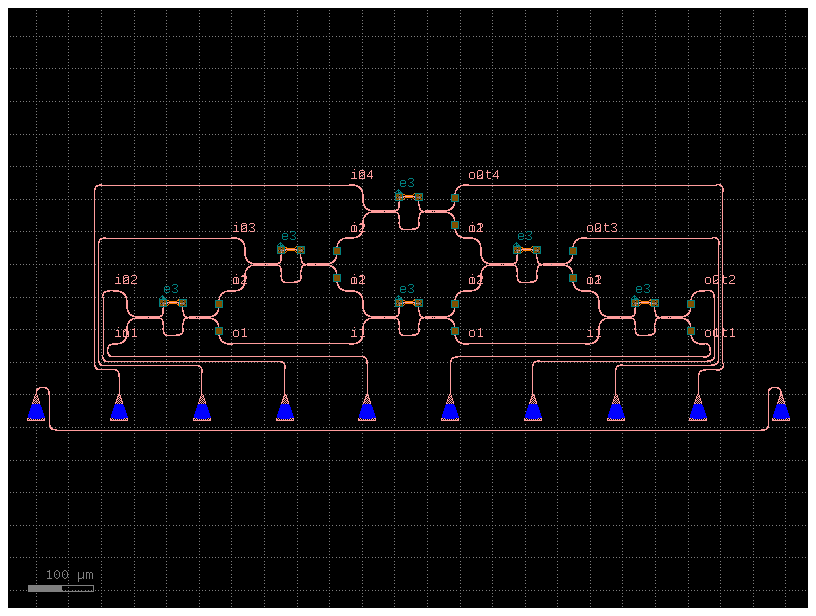

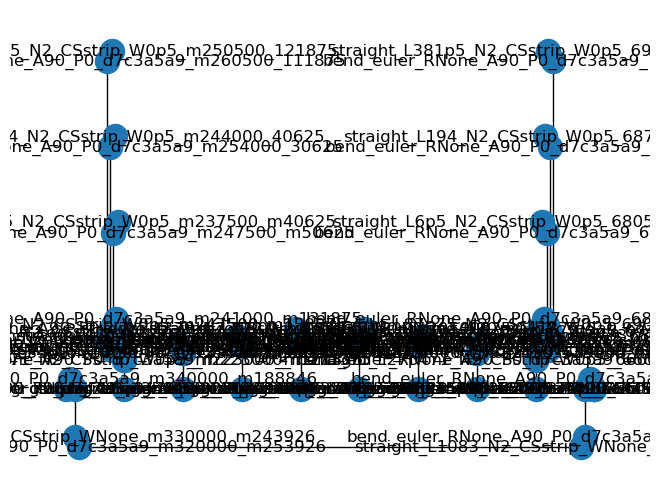

In [10]:
# ========================================
#       add fiber array I/O
# ========================================
mziMatrixIo = gf.routing.add_fiber_array(component=mziMatrix)

mziMatrixIo.plot()

mziMatrixIo.pprint_ports()

mziMatrixIo.plot_netlist()

In [11]:
from gdsfactory.generic_tech.layer_stack import get_layer_stack

layer_stack220 = get_layer_stack()

scene = mziMatrixIo.to_3d(layer_stack=layer_stack220)

scene.show()

In [12]:
c = gf.components.grating_coupler_elliptical_lumerical()
fiber_angles = [3, 5, 7]
jobs = [
    dict(
        component=c,
        is_3d=False,
        fiber_angle_deg=fiber_angle_deg,
        filepath=PATH.sparameters_repo / f"gc_angle{fiber_angle_deg}",
    )
    for fiber_angle_deg in fiber_angles
]
sps = gt.write_sparameters_grating_coupler_batch(jobs)

NameError: name 'PATH' is not defined

In [ ]:
for sp, fiber_angle_deg in zip(sps, fiber_angles):
    sp = sp.result()
    plt.plot(
        sp["wavelengths"],
        20 * np.log10(np.abs(sp["o2@0,o1@0"])),
        label=str(fiber_angle_deg),
    )

plt.xlabel("wavelength (um")
plt.ylabel("Transmission (dB)")
plt.title("transmission vs fiber angle (degrees)")
plt.legend()